<a href="https://colab.research.google.com/github/Gprieto88/datasci_4web_viz/blob/main/datasci_4web_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install ipywidgets



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FL = pd.read_json('https://data.cdc.gov/resource/swc5-untb.json?$query=SELECT%0A%20%20%60year%60%2C%0A%20%20%60stateabbr%60%2C%0A%20%20%60statedesc%60%2C%0A%20%20%60locationname%60%2C%0A%20%20%60datasource%60%2C%0A%20%20%60category%60%2C%0A%20%20%60measure%60%2C%0A%20%20%60data_value_unit%60%2C%0A%20%20%60data_value_type%60%2C%0A%20%20%60data_value%60%2C%0A%20%20%60data_value_footnote_symbol%60%2C%0A%20%20%60data_value_footnote%60%2C%0A%20%20%60low_confidence_limit%60%2C%0A%20%20%60high_confidence_limit%60%2C%0A%20%20%60totalpopulation%60%2C%0A%20%20%60locationid%60%2C%0A%20%20%60categoryid%60%2C%0A%20%20%60measureid%60%2C%0A%20%20%60datavaluetypeid%60%2C%0A%20%20%60short_question_text%60%2C%0A%20%20%60geolocation%60%2C%0A%20%20%60%3A%40computed_region_skr5_azej%60%0AWHERE%20caseless_one_of(%60stateabbr%60%2C%20%22FL%22)')

In [4]:
FL.columns

Index(['year', 'stateabbr', 'statedesc', 'locationname', 'datasource',
       'category', 'measure', 'data_value_unit', 'data_value_type',
       'data_value', 'low_confidence_limit', 'high_confidence_limit',
       'totalpopulation', 'locationid', 'categoryid', 'measureid',
       'datavaluetypeid', 'short_question_text', 'geolocation',
       ':@computed_region_skr5_azej'],
      dtype='object')

In [6]:
# Group by 'locationname'
grouped = FL.groupby('locationname').data_value.mean().sort_values(ascending=False)
grouped

locationname
St. Johns     56.146667
Palm Beach    55.973333
Duval         54.900000
Pinellas      54.878571
Charlotte     54.040000
                ...    
Suwannee      46.664286
Hendry        46.006667
Putnam        45.564286
Hardee        44.806667
Taylor        44.786667
Name: data_value, Length: 67, dtype: float64

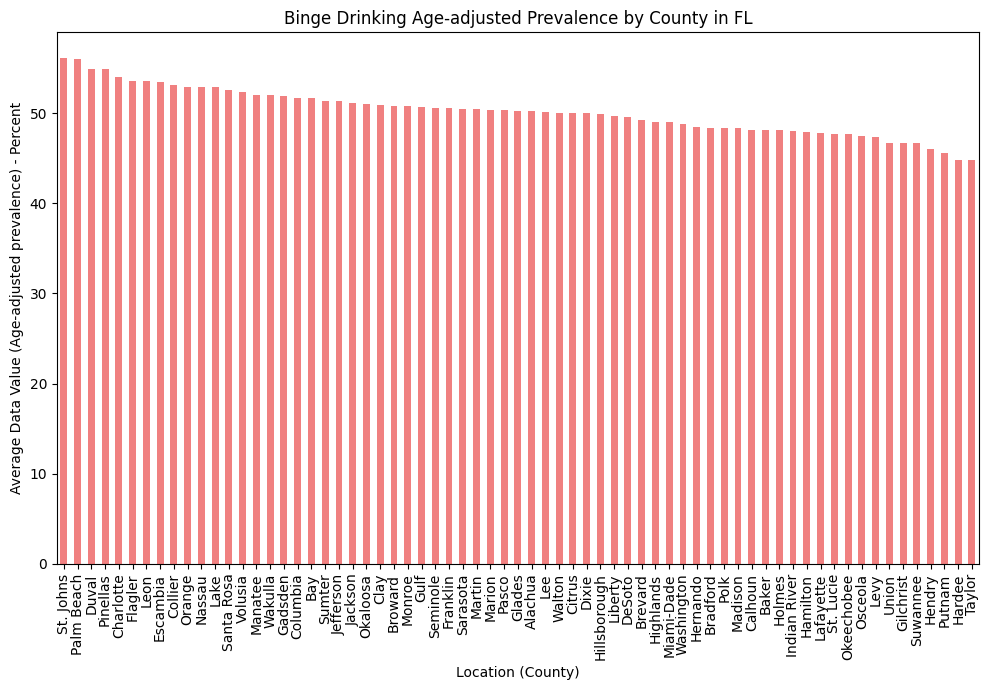

In [10]:
plt.figure(figsize=(10,7))
grouped.plot(kind='bar',color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Binge Drinking Age-adjusted Prevalence by County in FL')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("binge-drinking-perlocation.png")
# Saving the plot as an image
plt.show()




In [11]:
from pandas.core.arrays.floating import FLOAT_STR_TO_DTYPE
import ipywidgets as widgets
# Compute the average data value across all counties
avg_data_value = FL['data_value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(FL['locationname'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = FL[FL['locationname'] == County]['data_value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Binge Drinking Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Alachua', 'Baker', 'Bay', 'Bradford', 'Brevard'…